# Classification Predict TeamJS1 Solutions

© Explore Data Science Academy

#**<font color='blue'>Climate Change Belief Analysis</font>**
---
### Honour Code

We {**TeamJS1**}, confirm - by submitting this document - that the solutions in this notebook are a result of our work and that we abide by the [EDSA honour code](https://drive.google.com/file/d/1QDCjGZJ8-FmJE3bZdIQNwnJyQKPhHZBn/view?usp=sharing).

Non-compliance with the honour code constitutes a material breach of contract.

## Introduction: Climate Change Belief

<p align="justify" > Earth’s climate is undergoing changes never seen before by humans. Studying climate change will help us understand why global temperatures continue to rise, how the climate affects us, and how we can tackle this challenge before things get much worse. It is imperative to understand climate change for us to plan accordinlgy. Our understanding of the climate can help us predict how much rain will fall next winter as well as how much sea levels will rise as temperatures rise. Finding out what people think about climate change and whether they consider it to be a real threat is important.


### Predict Overview:Climate change

Many companies are built around lessening one’s environmental impact or carbon footprint and they would like to determine how people perceive climate change and whether or not they believe it is a real threat. Our company has been awarded a contract to:

- 1. analyse the supplied data;
- 2. identify potential errors in the data and clean the existing data set;
- 3. determine if additional features can be added to enrich the data set;
- 4. build a model that is capable of forecasting the three hourly demand shortfalls;
- 5. evaluate the accuracy of the best machine learning model;
- 6. determine what features were most important in the model’s prediction decision, and
- 7. explain the inner working of the model to a non-technical audience.

### Problem statement: 
Our tweeter data allows us to determine whether people in the tweeter data believe climate change is a threat given the ever-changing climate and global changes.

### Our Task: The classification of tweets
To create a Machine Learning model that is able to classify whether or not a person believes in climate change, based on their novel tweet data. Therefore, a robust solution for this task will allow companies to access a wealth of consumer sentiment that spans several demographic and geographical categories - so that their marketing strategies can be better informed. 

<div align="center" style="width: 800px; font-size: 100%; text-align: center; margin: 0 auto">
<img src="https://dnrec.alpha.delaware.gov/wp-content/uploads/sites/2/2020/02/climate-word-map.jpg"
     
Climate Change  Photo by <a href="https://dnrec.alpha.delaware.gov/coastal-programs/planning-training/adapting-to-sea-level-rise/climate-change-perceptions/"> Delaware </a> 
</div>

 ### Key Objectives:
    
1.   To analyse the tweets of Individual Twitter account in term of Sentiments;
2.   Identify individual tweets as news, pro, neutral and anti-climate change; & 
3.   Calculate the f1 score of the sentiments.


<a id="cont"></a>

## Table of Contents

<a href=#one>1. Importing Packages</a>

<a href=#two>2. Loading Data</a>

<a href=#three>3. Exploratory Data Analysis (EDA)</a>

<a href=#four>4. Data Engineering</a>

<a href=#five>5. Modeling</a>

<a href=#six>6. Model Performance</a>

<a href=#seven>7. Model Explanations</a>

In this section we are importing all the relavant packages which will be used for analysis, data cleaning and modeling.

<a id="one"></a>
## 1. Importing Packages
<a href=#cont>Back to Table of Contents</a>


In [106]:
!!pip install nlppreprocess

['Defaulting to user installation because normal site-packages is not writeable',
 'Requirement already satisfied: nlppreprocess in c:\\users\\selaelo debang\\appdata\\roaming\\python\\python39\\site-packages (1.0.2)']

In [147]:
# Libraries for data loading, data manipulation and data visulisation
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
%matplotlib inline

# Libraries for data preparation and model building
# Import the scaling module
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from PIL import Image

# Import train/test split module

#Modelling Libraries
from sklearn import metrics

#NLP Libraries
import nltk
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, TreebankWordTokenizer
from nltk import SnowballStemmer, PorterStemmer, LancasterStemmer
from nltk.stem import WordNetLemmatizer
import spacy
spacy.cli.download("en_core_web_sm")
from spacy.util import compounding
from spacy.util import minibatch
from nltk.tokenize.treebank import TreebankWordDetokenizer as Detok

# set plot style
sns.set()

✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')


<a id="two"></a>
## 2. Loading the Data
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [76]:
train_df = pd.read_csv('train.csv')
test_df = pd.read_csv('test_with_no_labels.csv')

In [10]:
test_df.head()

,message,tweetid
0,Europe will now be looking to China to make su...,169760
1,Combine this with the polling of staffers re c...,35326
2,"The scary, unimpeachable evidence that climate...",224985
3,@Karoli @morgfair @OsborneInk @dailykos \nPuti...,476263
4,RT @FakeWillMoore: 'Female orgasms cause globa...,872928


<a id="three"></a>
## 3. Exploratory Data Analysis (EDA)
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


In [16]:
#Checking the shape of the train and test set
train_df.shape

(15819, 3)

In [15]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15819 entries, 0 to 15818
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   sentiment  15819 non-null  int64 
 1   message    15819 non-null  object
 2   tweetid    15819 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 370.9+ KB


In [17]:
train_df.isnull().sum()

sentiment    0
message      0
tweetid      0
dtype: int64

In [18]:
train_df.describe()

,sentiment,tweetid
count,15819.000000,15819.000000
mean,0.917504,501719.433656
std,0.836537,289045.983132
min,-1.000000,6.000000
25%,1.000000,253207.500000
50%,1.000000,502291.000000
75%,1.000000,753769.000000
max,2.000000,999888.000000


In [19]:
train_df.skew()

C:\Users\Selaelo Debang\AppData\Local\Temp\ipykernel_14772\2566899487.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.skew()


sentiment   -0.683959
tweetid     -0.008471
dtype: float64

The column sentiment is moderately skewed to the negative direction while the column tweetid is fairly symmetrical

In [20]:
train_df.kurtosis()

C:\Users\Selaelo Debang\AppData\Local\Temp\ipykernel_14772\861045134.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  train_df.kurtosis()


sentiment    0.122976
tweetid     -1.193356
dtype: float64

From the above figures we can infer there are no outliers in our dataset

In [5]:
X = train_df['message']
y = train_df['sentiment']

Let's do a quick analysis of the distribution of observations across our labels

In [45]:
# Separate minority and majority classes
anti = train_df[y==-1]
neutral = train_df[y==0]
pro = train_df[y==1]
news = train_df[y==2]
y.value_counts()

 1    8530
 2    3640
 0    2353
-1    1296
Name: sentiment, dtype: int64

8530 tweets are believe, 3640 tweets are factual news about climate change, 2353 neither support nor refutes, and 1296 tweets do not believe in climate change

In [61]:
#checking for tweet sentiment percetage
temp = train_df.groupby('sentiment').count()['message'].reset_index().sort_values(by='message',ascending=False)
temp['percentage'] = round((temp['message']/temp['message'].sum())*100,0) 
temp.style.background_gradient(cmap='Purples')

,sentiment,message,percentage
2,1,8530,54.000000
3,2,3640,23.000000
1,0,2353,15.000000
0,-1,1296,8.000000


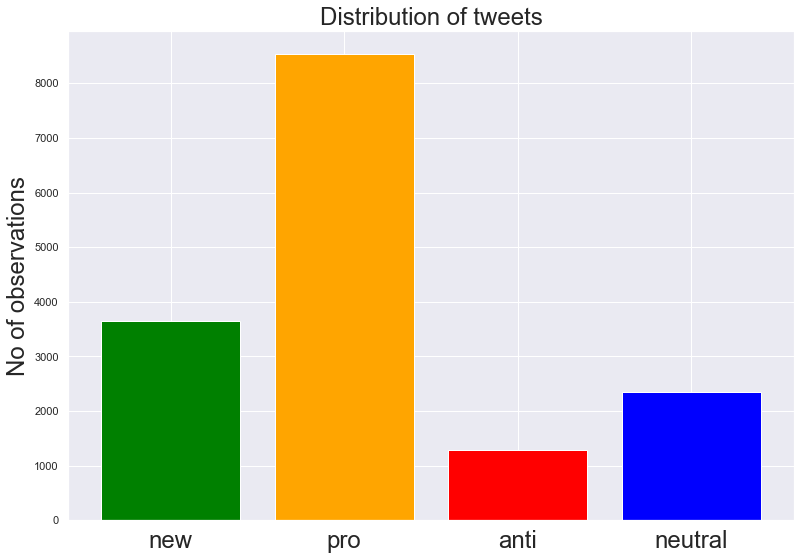

In [55]:
# Get all possible labels
plt.figure(figsize=(13,9))
labels = y.unique()
heights = [len(anti),len(neutral),len(pro),len(news)]
plt.bar(labels,heights,color= ["red", "blue", "orange", "green"])
plt.xticks(labels,['anti','neutral','pro','new'])
plt.ylabel("No of Observations")
plt.title("Distribution of tweets", fontsize = 24)
plt.ylabel("No of observations", fontsize = 24)
plt.xticks(labels,['anti', 'neutral', 'pro', 'new'], fontsize = 24)
plt.show()


The bar graph paints a clearer picture of the distribution of tweets and reveals that the train dataset is imbalanced. This imbalance will be dealt with at the later stage of modeling

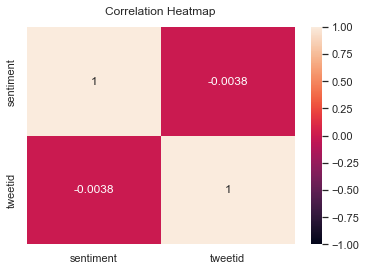

In [21]:
heatmap = sns.heatmap(train_df.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12);

From our heatmap above there is no indication of high correlation amongst our variables

<AxesSubplot:title={'center':'Density curve'}, xlabel='message', ylabel='Density'>

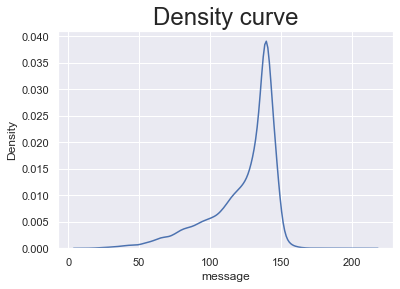

In [93]:
## Lenght of the Text using KDEplot
lenghth = train_df["message"].str.len()
plt.title("Density curve", fontsize = 24)
sns.kdeplot(lenght)

The curve is skewed to the left side of the distribution because that’s where the most values are located. It’s also lowest near the ends of the distribution because fewer message take on those values

### Word Cloud Visualization

Hashtags

In [155]:
#How many hashtags are there in a tweet?

'''
this function extract hashtags in tweet message
and returns the hashtags
''' 
def hashtag_extract(x):
    hashtags = []
    # Loop over the words in the tweet
    for i in x:
        ht = re.findall(r"#(\w+)", i)
        hashtags.append(ht)

    return hashtags
# extracting hashtags from positive/negative tweets

HT_positive = hashtag_extract(train_df['message'][train_df['sentiment'] == 1])

# extracting hashtags from racist/sexist tweets
HT_negative = hashtag_extract(train_df['message'][train_df['sentiment'] == -1])

# unnesting list
HT_positive = sum(HT_positive,[])
HT_negative = sum(HT_negative,[])


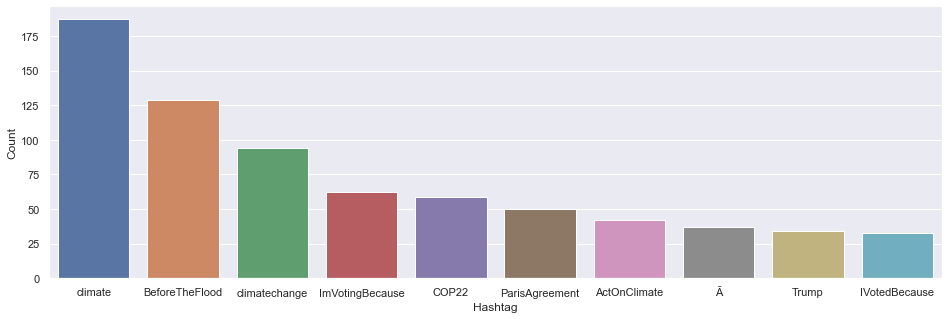

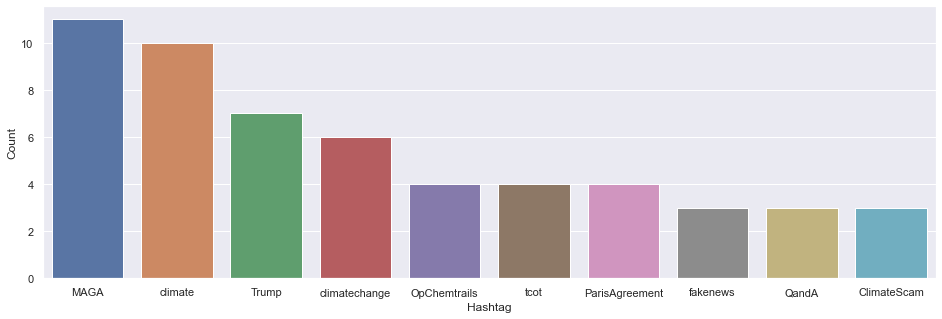

In [158]:
#Positive hastags
a = nltk.FreqDist(HT_positive)
d = pd.DataFrame({'Hashtag': list(a.keys()),
                  'Count': list(a.values())})

# selecting top 10 most frequent hashtags     
d = d.nlargest(columns="Count", n = 10) 
plt.figure(figsize=(16,5))
ax = sns.barplot(data=d, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()


#Negative hashtags
b = nltk.FreqDist(HT_negative)
e = pd.DataFrame({'Hashtag': list(b.keys()), 'Count': list(b.values())})

# selecting top 10 most frequent hashtags
e = e.nlargest(columns="Count", n = 10)   
plt.figure(figsize=(16,5))
ax = sns.barplot(data=e, x= "Hashtag", y = "Count")
ax.set(ylabel = 'Count')
plt.show()

<a id="four"></a>
## 4. Data Engineering
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


Perfomaing NLP on the message column

removing the web-urls, making everything lower case, removing punctuation

In [120]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [121]:
# Removing punctuations and unwanted characters present in the messages

def cleaning(text):
    """
    The Function makes text lowercase,removes links,
    punctuation(!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~)
    and words containing numbers.

    Parameters:
    argument1(object):It takes the text and converts all it to lowercases
    argument2(object):It takes all the special characters and removes them
    argument3(object):It takes the text and removes all numeric values
    argument4(object):It takes text and expand shortened words

    Returns:
    Object full word without the special characters and numeric values,
    all in lower case

    """
    contractions_dict = {"ain't": "am not / are not / is not / has not /have not",
                         "aren't": "are not / am not", "can't": "cannot",
                         "can't've": "cannot have",
                         "'cause": "because", "could've": "could have",
                         "couldn't": "could not",
                         "couldn't've": "could not have", "didn't": "did not",
                         "doesn't": "does not",
                         "don't": "do not", "hadn't": "had not",
                         "hadn't've": "had not have",
                         "hasn't": "has not", "haven't": "have not",
                         "he'd": "he had / he would",
                         "he'd've": "he would have",
                         "he'll": "he shall / he will",
                         "he'll've": "he shall have / he will have",
                         "he's": "he has / he is",
                         "how'd": "how did", "how'd'y": "how do you",
                         "how'll": "how will",
                         "how's": "how has / how is / how does",
                         "I'd": "I had / I would",
                         "I'd've": "I would have", "I'll": "I shall / I will",
                         "I'll've": "I shall have / I will have",
                         "I'm": "I am", "I've": "I have",
                         "isn't": "is not", "it'd": "it had / it would",
                         "it'd've": "it would have",
                         "it'll": "it shall / it will",
                         "it'll've": "it shall have / it will have",
                         "it's": "it has / it is", "let's": "let us",
                         "ma'am": "madam", "mayn't": "may not",
                         "might've": "might have", "mightn't": "might not",
                         "mightn't've": "might not have",
                         "must've": "must have", "mustn't": "must not",
                         "mustn't've": "must not have",
                         "needn't": "need not",
                         "needn't've": "need not have",
                         "o'clock": "of the clock",
                         "oughtn't": "ought not",
                         "oughtn't've": "ought not have",
                         "shan't": "shall not",
                         "sha'n't": "shall not",
                         "shan't've": "shall not have",
                         "she'd": "she had / she would",
                         "she'd've": "she would have",
                         "she'll": "she shall / she will",
                         "she'll've": "she shall have / she will have",
                         "she's": "she has / she is",
                         "should've": "should have",
                         "shouldn't": "should not",
                         "shouldn't've": "should not have",
                         "so've": "so have",
                         "so's": "so as / so is",
                         "that'd": "that would / that had",
                         "that'd've": "that would have",
                         "that's": "that has / that is",
                         "there'd": "there had / there would",
                         "there'd've": "there would have",
                         "there's": "there has / there is",
                         "they'd": "they had / they would",
                         "they'd've": "they would have",
                         "they'll": "they shall / they will",
                         "they'll've": "they shall have / they will have",
                         "they're": "they are",
                         "they've": "they have", "to've": "to have",
                         "wasn't": "was not",
                         "we'd": "we had / we would",
                         "we'd've": "we would have",
                         "we'll": "we will", "we'll've": "we will have",
                         "we're": "we are", "we've": "we have",
                         "weren't": "were not",
                         "what'll": "what shall / what will",
                         "what'll've": "what shall have / what will have",
                         "what're": "what are", "what's": "what has / what is",
                         "what've": "what have",
                         "when's": "when has / when is",
                         "when've": "when have",
                         "where'd": "where did",
                         "where's": "where has / where is",
                         "where've": "where have",
                         "who'll": "who shall / who will",
                         "who'll've": "who shall have / who will have",
                         "who's": "who has / who is", "who've": "who have",
                         "why's": "why has / why is", "why've": "why have",
                         "will've": "will have",
                         "won't": "will not", "won't've": "will not have",
                         "would've": "would have",
                         "wouldn't": "would not",
                         "wouldn't've": "would not have",
                         "y'all": "you all", "y'all'd": "you all would",
                         "y'all'd've": "you all would have",
                         "y'all're": "you all are",
                         "y'all've": "you all have",
                         "you'd": "you had / you would",
                         "you'd've": "you would have",
                         "you'll": "you shall / you will",
                         "you'll've": "you shall have / you will have",
                         "you're": "you are",
                         "you've": "you have"}
    for word in text.split():
        if word.lower() in contractions_dict:
            text = text.replace(word,contractions_dict[word.lower()])
# Make text lowercase        
    text = str(text).lower() 
# remove @user, #word and link
    text = ' '.join(re.sub("(@[A-Za-z0-9]+)|(#[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
# remove punctuation    
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) 
    text = re.sub('\n', '', text)
# remove numbers    
    text = ''.join([i for i in text[:] if not i.isdigit()])
    return text

train_df['clean_message']=train_df['message'].apply(lambda x: cleaning(x))
test_df['clean_message']=test_df['message'].apply(lambda x: cleaning(x))


In [119]:
train_df.head()

,sentiment,message,tweetid,tokens,clean_message
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"[PolySciMajor, EPA, chief, does, n't, think, c...",polyscimajor epa chief does not think carbon d...
1,1,It's not like we lack evidence of anthropogeni...,126103,"[It, 's, not, like, we, lack, evidence, of, an...",it has it is not like we lack evidence of anth...
2,2,RT @RawStory: Researchers say we have three ye...,698562,"[RT, @, RawStory, :, Researchers, say, we, hav...",rt researchers say we have three years to act ...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, p...",wired was a pivotal year in the war on climat...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"[RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, a...",rt it has it is and a racist sexist climate c...


In [122]:
train_df.shape

(15819, 5)

### Natural Language Tool Kit(NLKT)

Lemmatization

In [128]:
nlp = spacy.load("en_core_web_sm")


def lemmatizer(text):
    """The function takes a text and extracts the lemma word
    Parameters:
    argument(object):The function creates an empty list
    to insert all the lemma of the text
    Returns:
    lemma of the clean message
    """
    sent = []
    doc = nlp(text)
    for word in doc:
        sent.append(word.lemma_)
    return " ".join(sent)

train_df["lemmaa"] = train_df.apply(lambda x: lemmatizer(
                                   x['clean_message']), axis=1)
test_df["lemmaa"] = test_df.apply(lambda x: lemmatizer(
                                 x['clean_message']), axis=1)

In [129]:
train_df.head()

,sentiment,message,tweetid,tokens,clean_message,lemmaa
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"[PolySciMajor, EPA, chief, does, n't, think, c...",polyscimajor epa chief does not think carbon d...,polyscimajor epa chief do not think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,126103,"[It, 's, not, like, we, lack, evidence, of, an...",it has it is not like we lack evidence of anth...,it have it be not like we lack evidence of ant...
2,2,RT @RawStory: Researchers say we have three ye...,698562,"[RT, @, RawStory, :, Researchers, say, we, hav...",rt researchers say we have three years to act ...,rt researcher say we have three year to act on...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, p...",wired was a pivotal year in the war on climat...,wire be a pivotal year in the war on climate...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"[RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, a...",rt it has it is and a racist sexist climate c...,rt it have it be and a racist sexist climate...


Removing "rt"


This is removed because it does not add any significance to the text.

In [131]:
# removing rt
def remove(text):
    """
    removes rt from the lemmatized words,
    returns clean lemma words without rt
    """
    text = re.sub(r'rt', '', text)
    return text

train_df['clean_lemma'] = train_df['lemmaa'].apply(lambda x: remove(x))
test_df['clean_lemma'] = test_df['lemmaa'].apply(lambda x: remove(x))

In [133]:
train_df.head()

,sentiment,message,tweetid,tokens,clean_message,lemmaa,clean_lemma
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"[PolySciMajor, EPA, chief, does, n't, think, c...",polyscimajor epa chief does not think carbon d...,polyscimajor epa chief do not think carbon dio...,polyscimajor epa chief do not think carbon dio...
1,1,It's not like we lack evidence of anthropogeni...,126103,"[It, 's, not, like, we, lack, evidence, of, an...",it has it is not like we lack evidence of anth...,it have it be not like we lack evidence of ant...,it have it be not like we lack evidence of ant...
2,2,RT @RawStory: Researchers say we have three ye...,698562,"[RT, @, RawStory, :, Researchers, say, we, hav...",rt researchers say we have three years to act ...,rt researcher say we have three year to act on...,researcher say we have three year to act on c...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, p...",wired was a pivotal year in the war on climat...,wire be a pivotal year in the war on climate...,wire be a pivotal year in the war on climate...
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"[RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, a...",rt it has it is and a racist sexist climate c...,rt it have it be and a racist sexist climate...,it have it be and a racist sexist climate c...


Removing words shorter than 3

In [135]:
train_df['clean_lemma'] = train_df['clean_lemma'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
test_df['clean_lemma'] = test_df['clean_lemma'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))

In [137]:
train_df.head()

,sentiment,message,tweetid,tokens,clean_message,lemmaa,clean_lemma
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"[PolySciMajor, EPA, chief, does, n't, think, c...",polyscimajor epa chief does not think carbon d...,polyscimajor epa chief do not think carbon dio...,polyscimajor chief think carbon dioxide main c...
1,1,It's not like we lack evidence of anthropogeni...,126103,"[It, 's, not, like, we, lack, evidence, of, an...",it has it is not like we lack evidence of anth...,it have it be not like we lack evidence of ant...,have like lack evidence anthropogenic global w...
2,2,RT @RawStory: Researchers say we have three ye...,698562,"[RT, @, RawStory, :, Researchers, say, we, hav...",rt researchers say we have three years to act ...,rt researcher say we have three year to act on...,researcher have three year climate change befo...
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, p...",wired was a pivotal year in the war on climat...,wire be a pivotal year in the war on climate...,wire pivotal year climate change
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"[RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, a...",rt it has it is and a racist sexist climate c...,rt it have it be and a racist sexist climate...,have racist sexist climate change deny bigot l...


Tokenization

In [139]:
def tokenization(text):
    """
    split the message into token of words
    Returns a token of each word contained in the text(tweet)
    """
    text = word_tokenize(text)
    return text

train_df['tokenized_message'] = train_df['clean_lemma'].apply(lambda x:
                                                              tokenization
                                                              (x.lower()))
test_df['tokenized_message'] = test_df['clean_lemma'].apply(lambda x:
                                                            tokenization
                                                            (x.lower()))

In [141]:
train_df.head()

,sentiment,message,tweetid,tokens,clean_message,lemmaa,clean_lemma,tokenized_message
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"[PolySciMajor, EPA, chief, does, n't, think, c...",polyscimajor epa chief does not think carbon d...,polyscimajor epa chief do not think carbon dio...,polyscimajor chief think carbon dioxide main c...,"[polyscimajor, chief, think, carbon, dioxide, ..."
1,1,It's not like we lack evidence of anthropogeni...,126103,"[It, 's, not, like, we, lack, evidence, of, an...",it has it is not like we lack evidence of anth...,it have it be not like we lack evidence of ant...,have like lack evidence anthropogenic global w...,"[have, like, lack, evidence, anthropogenic, gl..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,"[RT, @, RawStory, :, Researchers, say, we, hav...",rt researchers say we have three years to act ...,rt researcher say we have three year to act on...,researcher have three year climate change befo...,"[researcher, have, three, year, climate, chang..."
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, p...",wired was a pivotal year in the war on climat...,wire be a pivotal year in the war on climate...,wire pivotal year climate change,"[wire, pivotal, year, climate, change]"
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"[RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, a...",rt it has it is and a racist sexist climate c...,rt it have it be and a racist sexist climate...,have racist sexist climate change deny bigot l...,"[have, racist, sexist, climate, change, deny, ..."


Stop words

In [142]:
## NlP Processing
ps = PorterStemmer()
lemma = WordNetLemmatizer()

## Checking for stopwords
stop_words=set(stopwords.words("english"))
print(stop_words)

{'you', 'there', 're', 'no', 'an', 'few', 'from', "you've", "you'd", 'above', 'not', 'yourself', 'couldn', 'about', 'while', 'its', 's', 'both', 'yourselves', 'had', 'be', 'shan', 'hadn', 'should', 'up', 'am', "aren't", 'won', 'further', 'with', 'him', "wouldn't", 'and', 'where', 'me', 'my', 'the', "mustn't", 'she', 'will', 'who', 'because', 'shouldn', 'll', 'm', 'wouldn', 'that', 'of', 'through', 'isn', 'ours', "isn't", 'now', 'before', 'being', 'y', 'mightn', 'them', 'didn', 'but', 'by', 'each', 'has', 'ma', 'have', 'was', 'then', 'any', "you're", 'too', 'or', 'how', 'theirs', 'out', 'what', 'down', 'just', 'is', 'doesn', 'o', 'more', 'aren', 'most', 'his', 'himself', 'once', 'needn', 'hers', "you'll", 't', 'if', 'against', 'it', 'for', 'whom', "haven't", 'they', 'so', "don't", 'these', 'below', "needn't", "mightn't", 'this', 'at', 'on', 'herself', 'i', 'yours', 'those', 'can', "doesn't", 'into', 'in', 'did', 'ain', 'd', 'when', 'he', 'their', "couldn't", 'between', 'during', 'other'

Removing stop words

In [143]:
# removing stop words
train_df['clean_stp_words'] = train_df[
                                       'tokenized_message'].apply(
                                        lambda x: [item for item in x
                                                   if item not in stop_words])

test_df['clean_stp_words'] = test_df[
                                    'tokenized_message'].apply(
                                    lambda x: [item for item in x
                                               if item not in stop_words])

In [145]:
train_df.head()

,sentiment,message,tweetid,tokens,clean_message,lemmaa,clean_lemma,tokenized_message,clean_stp_words
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"[PolySciMajor, EPA, chief, does, n't, think, c...",polyscimajor epa chief does not think carbon d...,polyscimajor epa chief do not think carbon dio...,polyscimajor chief think carbon dioxide main c...,"[polyscimajor, chief, think, carbon, dioxide, ...","[polyscimajor, chief, think, carbon, dioxide, ..."
1,1,It's not like we lack evidence of anthropogeni...,126103,"[It, 's, not, like, we, lack, evidence, of, an...",it has it is not like we lack evidence of anth...,it have it be not like we lack evidence of ant...,have like lack evidence anthropogenic global w...,"[have, like, lack, evidence, anthropogenic, gl...","[like, lack, evidence, anthropogenic, global, ..."
2,2,RT @RawStory: Researchers say we have three ye...,698562,"[RT, @, RawStory, :, Researchers, say, we, hav...",rt researchers say we have three years to act ...,rt researcher say we have three year to act on...,researcher have three year climate change befo...,"[researcher, have, three, year, climate, chang...","[researcher, three, year, climate, change, late]"
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, p...",wired was a pivotal year in the war on climat...,wire be a pivotal year in the war on climate...,wire pivotal year climate change,"[wire, pivotal, year, climate, change]","[wire, pivotal, year, climate, change]"
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"[RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, a...",rt it has it is and a racist sexist climate c...,rt it have it be and a racist sexist climate...,have racist sexist climate change deny bigot l...,"[have, racist, sexist, climate, change, deny, ...","[racist, sexist, climate, change, deny, bigot,..."


Detokenization

In [148]:
def detokenization(text):
    """
    Takes the tokenized text and removes the tokenization
    Returns text that is detokenized
    """
    detokenizer = Detok()
    text = detokenizer.detokenize(text)
    return text
train_df['detokenized_message'] = train_df['clean_stp_words'].apply(lambda x:
                                                            detokenization(x))

test_df['detokenized_message'] = test_df['clean_stp_words'].apply(lambda x:
                                                          detokenization(x))

In [149]:
train_df.head()

,sentiment,message,tweetid,tokens,clean_message,lemmaa,clean_lemma,tokenized_message,clean_stp_words,detokenized_message
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"[PolySciMajor, EPA, chief, does, n't, think, c...",polyscimajor epa chief does not think carbon d...,polyscimajor epa chief do not think carbon dio...,polyscimajor chief think carbon dioxide main c...,"[polyscimajor, chief, think, carbon, dioxide, ...","[polyscimajor, chief, think, carbon, dioxide, ...",polyscimajor chief think carbon dioxide main c...
1,1,It's not like we lack evidence of anthropogeni...,126103,"[It, 's, not, like, we, lack, evidence, of, an...",it has it is not like we lack evidence of anth...,it have it be not like we lack evidence of ant...,have like lack evidence anthropogenic global w...,"[have, like, lack, evidence, anthropogenic, gl...","[like, lack, evidence, anthropogenic, global, ...",like lack evidence anthropogenic global warming
2,2,RT @RawStory: Researchers say we have three ye...,698562,"[RT, @, RawStory, :, Researchers, say, we, hav...",rt researchers say we have three years to act ...,rt researcher say we have three year to act on...,researcher have three year climate change befo...,"[researcher, have, three, year, climate, chang...","[researcher, three, year, climate, change, late]",researcher three year climate change late
3,1,#TodayinMaker# WIRED : 2016 was a pivotal year...,573736,"[#, TodayinMaker, #, WIRED, :, 2016, was, a, p...",wired was a pivotal year in the war on climat...,wire be a pivotal year in the war on climate...,wire pivotal year climate change,"[wire, pivotal, year, climate, change]","[wire, pivotal, year, climate, change]",wire pivotal year climate change
4,1,"RT @SoyNovioDeTodas: It's 2016, and a racist, ...",466954,"[RT, @, SoyNovioDeTodas, :, It, 's, 2016, ,, a...",rt it has it is and a racist sexist climate c...,rt it have it be and a racist sexist climate...,have racist sexist climate change deny bigot l...,"[have, racist, sexist, climate, change, deny, ...","[racist, sexist, climate, change, deny, bigot,...",racist sexist climate change deny bigot lead poll


Difference in raw message and clean message

In [152]:
# creating two new columns in train data
train_df['Num_words_raw'] = train_df['message'].apply(lambda
                                                      x: len(str(x).split()))
train_df['Num_words_clean'] = train_df['clean_message'].apply(
                                                              lambda x:
                                                              len(str(
                                                                  x).split()))

# Difference in Number of word in raw data and clean
train_df['difference_in_wordsNo'] = abs(train_df['Num_words_raw'] -
                                        train_df['Num_words_clean'])

# test data frame
test_df['Num_words_raw'] = test_df['message'].apply(lambda
                                                    x: len(str(x).split()))
test_df['Num_words_clean'] = test_df['clean_message'].apply(lambda x:
                                                            len(str(x).split(
                                                            )))


# Difference in Number of words text and Selected Text
test_df['difference_in_wordsNo'] = abs(test_df['Num_words_raw']
                                       - test_df['Num_words_clean'])

In [153]:
train_df.head(3)

,sentiment,message,tweetid,tokens,clean_message,lemmaa,clean_lemma,tokenized_message,clean_stp_words,detokenized_message,Num_words_raw,Num_words_clean,difference_in_wordsNo
0,1,PolySciMajor EPA chief doesn't think carbon di...,625221,"[PolySciMajor, EPA, chief, does, n't, think, c...",polyscimajor epa chief does not think carbon d...,polyscimajor epa chief do not think carbon dio...,polyscimajor chief think carbon dioxide main c...,"[polyscimajor, chief, think, carbon, dioxide, ...","[polyscimajor, chief, think, carbon, dioxide, ...",polyscimajor chief think carbon dioxide main c...,19,18,1
1,1,It's not like we lack evidence of anthropogeni...,126103,"[It, 's, not, like, we, lack, evidence, of, an...",it has it is not like we lack evidence of anth...,it have it be not like we lack evidence of ant...,have like lack evidence anthropogenic global w...,"[have, like, lack, evidence, anthropogenic, gl...","[like, lack, evidence, anthropogenic, global, ...",like lack evidence anthropogenic global warming,10,13,3
2,2,RT @RawStory: Researchers say we have three ye...,698562,"[RT, @, RawStory, :, Researchers, say, we, hav...",rt researchers say we have three years to act ...,rt researcher say we have three year to act on...,researcher have three year climate change befo...,"[researcher, have, three, year, climate, chang...","[researcher, three, year, climate, change, late]",researcher three year climate change late,19,17,2


In [159]:
#### Word Cloud Visualization on Clean Data

<a id="five"></a>
## 5. Modeling
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>


<a id="six"></a>
## 6. Model Performance
<a class="anchor" id="1.1"></a>
<a href=#cont>Back to Table of Contents</a>

## Conclusion